<IPython.core.display.Javascript object>

In [26]:
import pandas as pd  # import panddas for dataframe
import numpy as np  # import numpy for operations and arrays
import matplotlib.pyplot as plt  # import matplotlib for plotting

dfURL = """SYB64_246_202110_Population Growth, Fertility and Mortality Indicators.csv"""
df = pd.read_csv(dfURL, encoding="ISO-8859-1", header=1)  # import csv and add encoding
df  # print the data frame


,Region/Country/Area,Unnamed: 1,Year,Series,Value,Footnotes,Source
0,1,"Total, all countries or areas",2010,Population annual rate of increase (percent),1.2,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."
1,1,"Total, all countries or areas",2010,Total fertility rate (children per women),2.6,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."
2,1,"Total, all countries or areas",2010,"Infant mortality for both sexes (per 1,000 liv...",41.0,Data refers to a 5-year period preceding the r...,"United Nations Statistics Division, New York, ..."
3,1,"Total, all countries or areas",2010,"Maternal mortality ratio (deaths per 100,000 p...",248,NaN,"World Health Organization (WHO), the United Na..."
4,1,"Total, all countries or areas",2010,Life expectancy at birth for both sexes (years),68.9,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."
...,...,...,...,...,...,...,...
4894,716,Zimbabwe,2020,Total fertility rate (children per women),3.6,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."
4895,716,Zimbabwe,2020,"Infant mortality for both sexes (per 1,000 liv...",38.7,Data refers to a 5-year period preceding the r...,"United Nations Statistics Division, New York, ..."
4896,716,Zimbabwe,2020,Life expectancy at birth for both sexes (years),60.8,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."
4897,716,Zimbabwe,2020,Life expectancy at birth for males (years),59.2,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."


In [16]:
useableData = countryData.loc[625:]  # select values from index 625 onwards
countryData = df.loc[
    df["Series"] == "Life expectancy at birth for both sexes (years)"
]  # index all countries onwards
useableData  # display new dataframe


,Region/Country/Area,Unnamed: 1,Year,Series,Value,Footnotes,Source
628,4,Afghanistan,2010,Life expectancy at birth for both sexes (years),59.6,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."
635,4,Afghanistan,2015,Life expectancy at birth for both sexes (years),62.3,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."
642,4,Afghanistan,2020,Life expectancy at birth for both sexes (years),64.3,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."
649,8,Albania,2010,Life expectancy at birth for both sexes (years),75.6,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."
656,8,Albania,2015,Life expectancy at birth for both sexes (years),77.5,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."
...,...,...,...,...,...,...,...
4868,894,Zambia,2015,Life expectancy at birth for both sexes (years),59.3,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."
4875,894,Zambia,2020,Life expectancy at birth for both sexes (years),63.3,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."
4882,716,Zimbabwe,2010,Life expectancy at birth for both sexes (years),45.0,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."
4889,716,Zimbabwe,2015,Life expectancy at birth for both sexes (years),56.7,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."


In [17]:
nparray = useableData.to_numpy()  # convert to numpy array


In [18]:
nparray.size


4221

(603, 7)

In [28]:
useableData.Value = useableData.Value.astype(float)


In [32]:
getMean = useableData["Value"].mean()  # Find the mean of the values
getMedian = useableData["Value"].median()  # find the median of the Value column


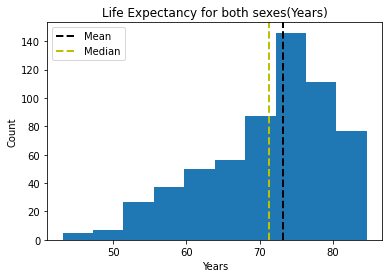

In [43]:
plt.title("Life Expectancy for both sexes(Years)")
plt.hist(
    useableData["Value"], bins=10,
)
plt.xlabel("Years")  # X Label
plt.ylabel("Count")  # Y Label
plt.axvline(getMedian, color="k", linestyle="dashed", linewidth=2.5)
plt.axvline(getMean, color="y", linestyle="dashed", linewidth=2.5)
plt.legend({"Mean": getMean, "Median": getMedian})


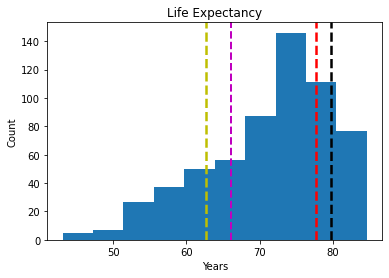

In [51]:
q75, q25 = np.percentile(useableData["Value"], [25, 75])
standarddev = useableData["Value"].std()
meanminussig = getMean - standarddev
meansumsig = getMean + standarddev
plt.hist(useableData["Value"], bins=10)
plt.title("Life Expectancy")
plt.ylabel("Count")
plt.xlabel("Years")
plt.axvline(q25, color="r", linestyle="dashed", linewidth=2.5)
plt.axvline(meanminussig, color="y", linestyle="dashed", linewidth=2.5)
plt.axvline(q75, color="m", linestyle="dashed", linewidth=2)
plt.axvline(meansumsig, color="k", linestyle="dashed", linewidth=2.5)
plt.legend
